# Amazon Alexa Reviews Classification

# Setting the Objective

The objective is to discover insights on consumer reviews and perform sentiment analysis. <br>
Now let's start with importing the libraries, loading the data and have a quick look on the data.


# Importing the Data

import libraries 

In [1]:
import pandas as pd # data manipulation using dataframes
import numpy as np # statistical analysis 
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

loading the data

In [2]:
amazon_df = pd.read_csv('amazon_alexa.tsv', sep='\t')

A quick look on the first rows of data

In [3]:
amazon_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


And a look on the last rows of data

In [4]:
amazon_df.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


Verified reviews column is the pillar of our analysis, let's read some reviews

In [5]:
amazon_df['verified_reviews'].head(30)

0                                         Love my Echo!
1                                             Loved it!
2     Sometimes while playing a game, you can answer...
3     I have had a lot of fun with this thing. My 4 ...
4                                                 Music
5     I received the echo as a gift. I needed anothe...
6     Without having a cellphone, I cannot use many ...
7     I think this is the 5th one I've purchased. I'...
8                                           looks great
9     Love it! I’ve listened to songs I haven’t hear...
10    I sent it to my 85 year old Dad, and he talks ...
11    I love it! Learning knew things with it eveyda...
12    I purchased this for my mother who is having k...
13                                   Love, Love, Love!!
14                             Just what I expected....
15                            I love it, wife hates it.
16    Really happy with this purchase.  Great speake...
17    We have only been using Alexa for a couple

# Visualizing the Data

In [6]:
# creating datasets of positive and negative feedbacks
positive = amazon_df[amazon_df['feedback']==1]
negative = amazon_df[amazon_df['feedback']==0]

Let's see some negative feedbacks

In [7]:
print("There are "+ str(len(negative)) + " negative feedbacks: ")
negative["verified_reviews"].head(30)

There are 257 negative feedbacks: 


46     It's like Siri, in fact, Siri answers more acc...
111    Sound is terrible if u want good music too get...
141                                   Not much features.
162    Stopped working after 2 weeks ,didn't follow c...
176                                 Sad joke. Worthless.
187    Really disappointed Alexa has to be plug-in to...
205    It's got great sound and bass but it doesn't w...
233    I am not super impressed with Alexa. When my P...
299    Too difficult to set up.  It keeps timing out ...
341                               Alexa hardly came on..
350    Item no longer works after just 5 months of us...
361    This thing barely works. You have to select 3r...
368    I returned 2 Echo Dots & am only getting refun...
369                                          not working
373            I'm an Echo fan but this one did not work
374                                                     
376    Doesn't always respond when spoken to with pro...
381    It worked for a month or

Let's see the counts of feedbacks on a bar graph

There are 257 negative feedbacks: 
There are 2893 positive feedbacks: 


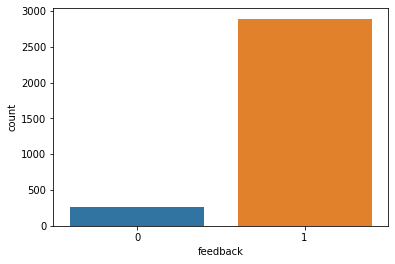

In [8]:
sns.countplot(amazon_df['feedback'], label = "Count") 
print("There are "+ str(len(negative)) + " negative feedbacks: ")
print("There are "+ str(len(positive)) + " positive feedbacks: ")

Now we check the ratings similarly

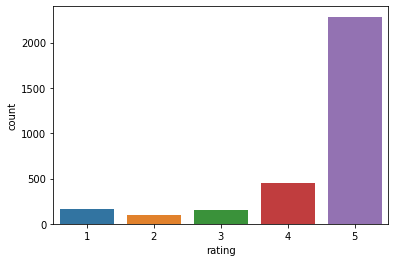

In [9]:
sns.countplot(x = 'rating', data = amazon_df)

# Feature Engineering

We will not work  on the ratings and dates, we will focus on the reviews <br>
We drop those columns

In [10]:
amazon_df = amazon_df.drop(['date', 'rating'],axis=1)
amazon_df.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


Next we make dummies of the categorical variable "variation" <br>
We use "drop_first" to cope with the multi-collinearity trap (one value can be predicted from the other values)

In [11]:
variation_dummies = pd.get_dummies(amazon_df['variation'], drop_first = True)

Now we replace the categorical column with the dummies

In [12]:
amazon_df.drop(['variation'], axis=1, inplace=True)
amazon_df = pd.concat([amazon_df, variation_dummies], axis=1)
amazon_df.head()

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Now, since we will work with reviews, we also need to vectorize them <br>
Which means transforming text to dummies <br>
We need this to train a model on reviews <br>
<br>
We will use the CountVectorizer class


In [13]:
#We import the library needed to the transformation

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
amazon_countvectorizer = vectorizer.fit_transform(amazon_df['verified_reviews'])

When we look at the shape of our vectorized reviews:

In [14]:
amazon_countvectorizer.shape

(3150, 4044)

We see that we now have over 4000 columns <br>
Which is not practical to train a model for nearly 3000 instances <br>
We will come to that, but first let's what has CountVectorizer actually done <br>
<br>
We print the names of those some 4000 columns:


In [15]:
print(vectorizer.get_feature_names())

['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activat

These features simply represent each word occured in the reviews <br>
For each row, corresponding value means the number of occurance of that word in that review

Now we drop the verified_reviews columns and add the vectorized array instead

In [16]:
amazon_df.drop(['verified_reviews'], axis=1, inplace=True)
reviews = pd.DataFrame(amazon_countvectorizer.toarray())
amazon_df = pd.concat([amazon_df, reviews], axis=1)
amazon_df.head(10)

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


We now assign feedback column to **y** and all other columns to __X__

In [17]:
y = amazon_df['feedback']
X = amazon_df.drop(['feedback'],axis=1)

# Training the Model